<a href="https://colab.research.google.com/github/PSivaMallikarjun/San-Francisco-Crime-Geographical-Clustering-using-Machine-Learning/blob/main/San_Francisco_Crime_Geographical_Clustering_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we will perform geographic clustering using Geolocation information (Latitude & Longitude) using a data set created by the SFPD (San Francisco Police Department), which includes crimes committed in the city of San Francisco between 2003-2015.

We will also learn to determine the optimal number of clusters (hyperparameter K-value) for this data set using the Elbow method. Then, we will display the geographic coordinates in our clustering results on a Python-based geographic map system.

Finally, we will learn how to export this map we created to an HTML file.

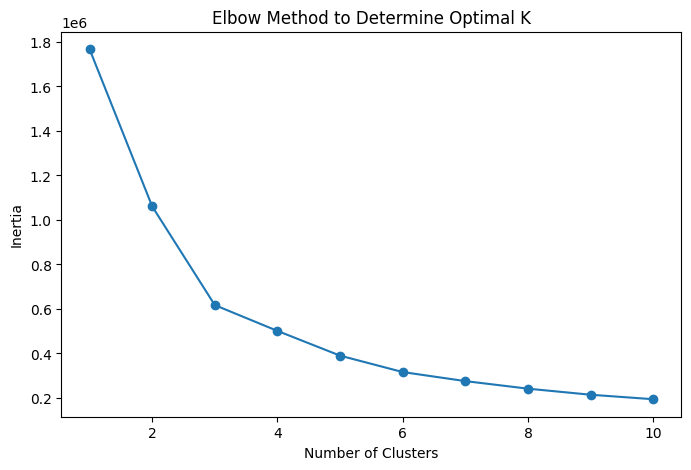

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import folium
from folium.plugins import MarkerCluster

# Load dataset
data_url = "https://data.sfgov.org/api/views/wg3w-h783/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(data_url, usecols=['Latitude', 'Longitude'])

# Drop null values
df.dropna(inplace=True)

# Standardize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determine optimal K using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

# Apply KMeans with optimal K (let's assume K=5 based on Elbow Method)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Create Folium Map
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=12)
marker_cluster = MarkerCluster().add_to(crime_map)

for idx, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  icon=folium.Icon(color='blue' if row['Cluster'] == 0 else 'red' if row['Cluster'] == 1 else 'green' if row['Cluster'] == 2 else 'purple' if row['Cluster'] == 3 else 'orange')).add_to(marker_cluster)

# Save map to HTML file
crime_map.save("san_francisco_crime_clusters.html")

# Display map
crime_map
